In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Cardiotocographic.csv")

In [3]:
sns.set(style="whitegrid")


In [4]:
print(data.head())


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [6]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [7]:
data.dropna(inplace=True)

In [9]:
print("\nData types before correction:\n", data.dtypes)


Data types before correction:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [14]:
# Detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df < lower_bound) | (df > upper_bound)]

outliers = {}
for column in data.columns:
    outliers[column] = detect_outliers_iqr(data[column])

# Step 2: Statistical Summary
summary = data.describe()
print("\nStatistical Summary:\n", summary)

# Highlight interesting findings
print("\nInteresting findings:")
for col in summary.columns:
    if summary[col]['mean'] > summary[col]['75%']:
        print(f"{col} has a mean higher than the 75th percentile.")


Statistical Summary:
                 LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.00

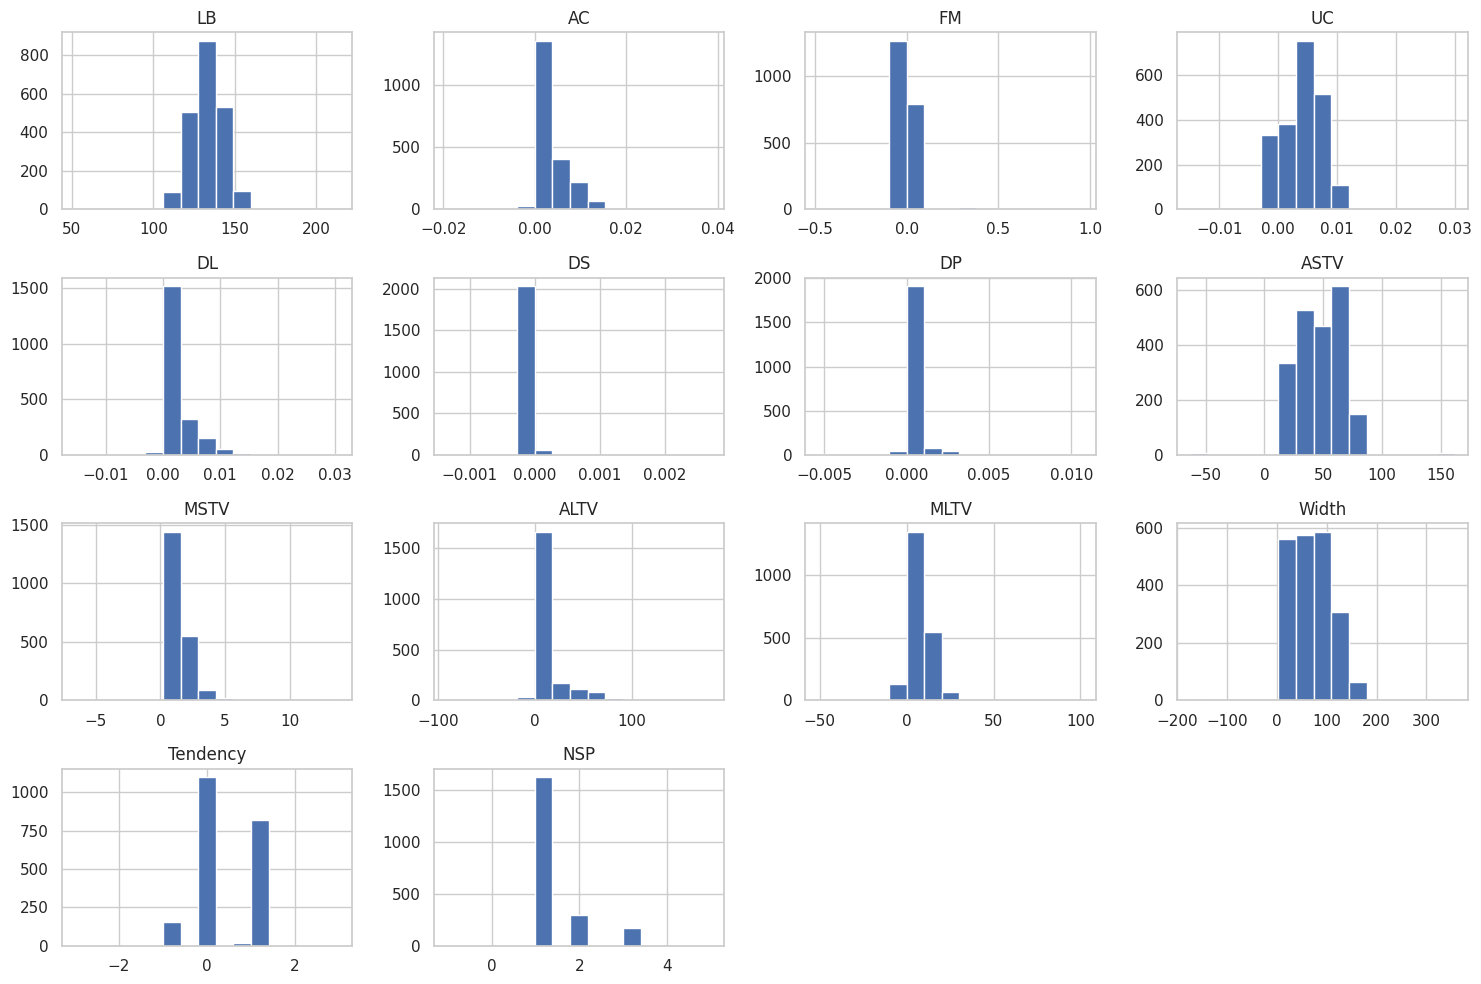

In [11]:
# Histograms for numerical variables
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

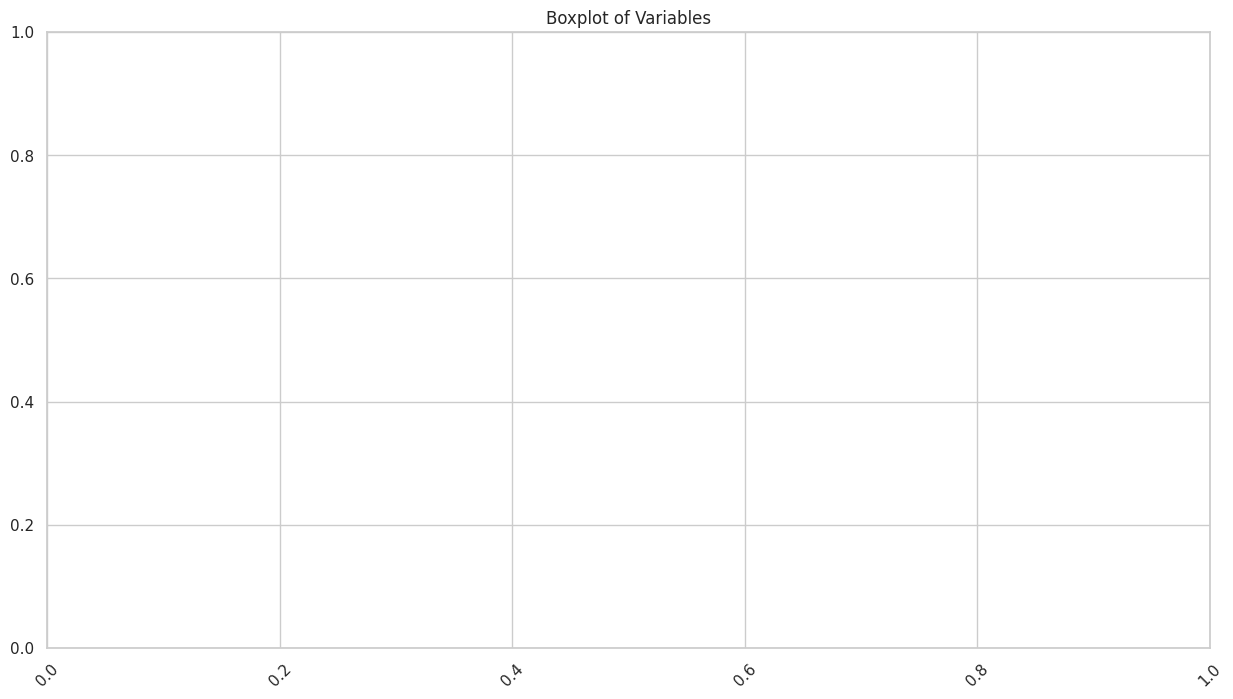

In [15]:
# Boxplots for identifying outliers
plt.figure(figsize=(15, 8))
sns.boxplot(df=data)
plt.xticks(rotation=45)
plt.title("Boxplot of Variables")
plt.show()

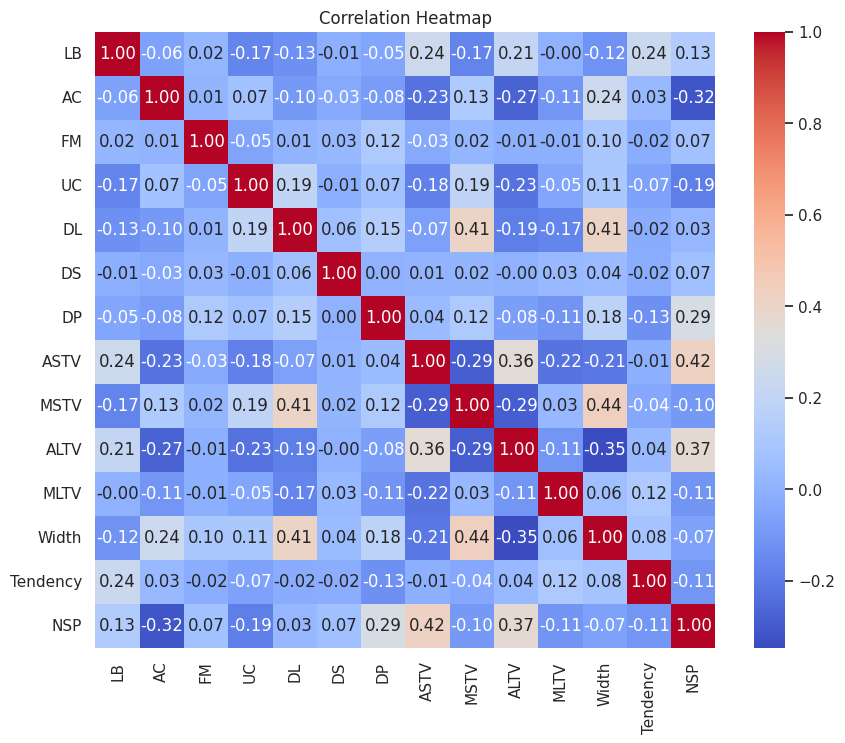

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

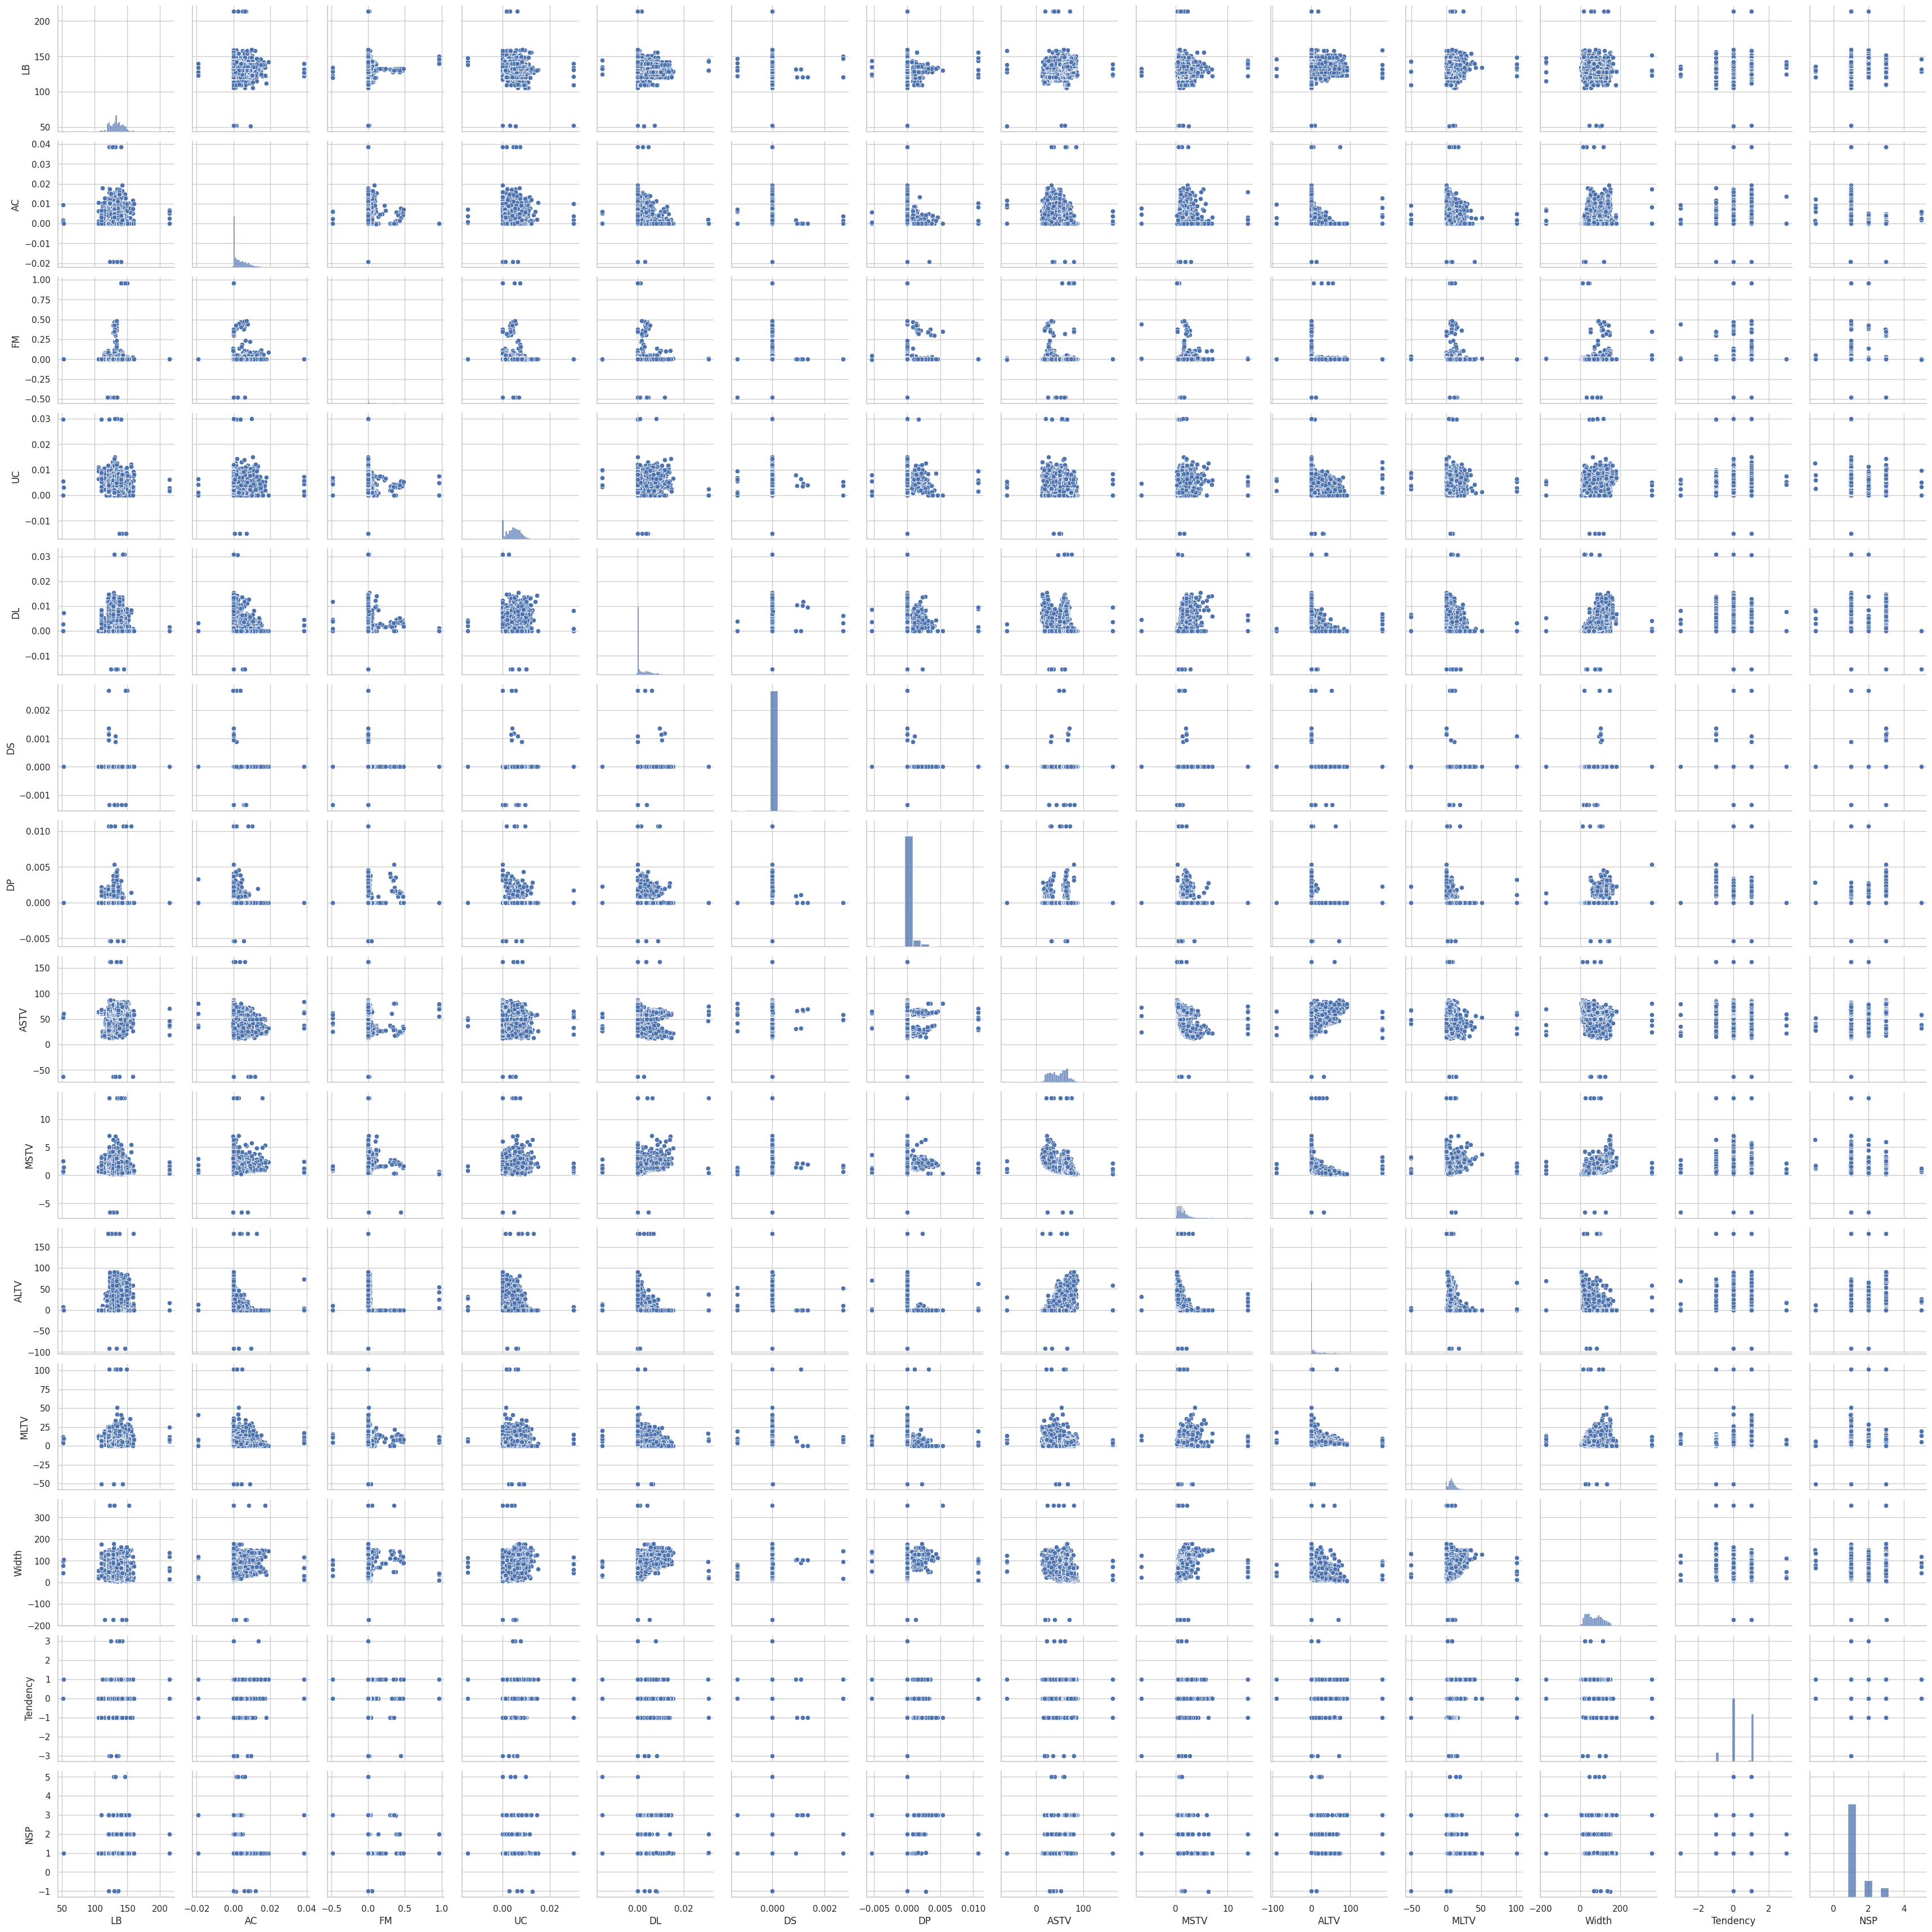

In [18]:
# Pair plots for deeper insights
sns.pairplot(data)
plt.show()

In [19]:
# Identify correlations
correlations = data.corr()
print("\nCorrelation Matrix:\n", correlations)


Correlation Matrix:
                 LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.010152  0.070135 -0.095491 -0.033623   
FM        0.018777  0.010152  1.000000 -0.052979  0.009830  0.029901   
UC       -0.166570  0.070135 -0.052979  1.000000  0.191864 -0.006937   
DL       -0.126959 -0.095491  0.009830  0.191864  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.230487 -0.032783 -0.181133 -0.070792  0.008452   
MSTV     -0.170473  0.126752  0.017481  0.190011  0.410155  0.016163   
ALTV      0.210728 -0.273890 -0.012276 -0.227817 -0.186571 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.

In [20]:
high_correlations = correlations[correlations > 0.5].stack().index.tolist()
print("\nHigh correlations (>0.5):", high_correlations)


High correlations (>0.5): [('LB', 'LB'), ('AC', 'AC'), ('FM', 'FM'), ('UC', 'UC'), ('DL', 'DL'), ('DS', 'DS'), ('DP', 'DP'), ('ASTV', 'ASTV'), ('MSTV', 'MSTV'), ('ALTV', 'ALTV'), ('MLTV', 'MLTV'), ('Width', 'Width'), ('Tendency', 'Tendency'), ('NSP', 'NSP')]


In [21]:
# Conclusion
print("\nConclusion:")
print("Key insights and patterns discovered through the analysis will be summarized here.")


Conclusion:
Key insights and patterns discovered through the analysis will be summarized here.
